<a href="https://colab.research.google.com/github/harjaskaur/covid19-data-analysis/blob/main/covid19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# Load dataset from Our World in Data (OWID)
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Preview
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
# Select relevant columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
         'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']]

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter a few countries
countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']
df_countries = df[df['location'].isin(countries)].copy()

# Fill missing values for simplicity
df_countries.fillna(0, inplace=True)


<ipython-input-3-4522ce179565>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


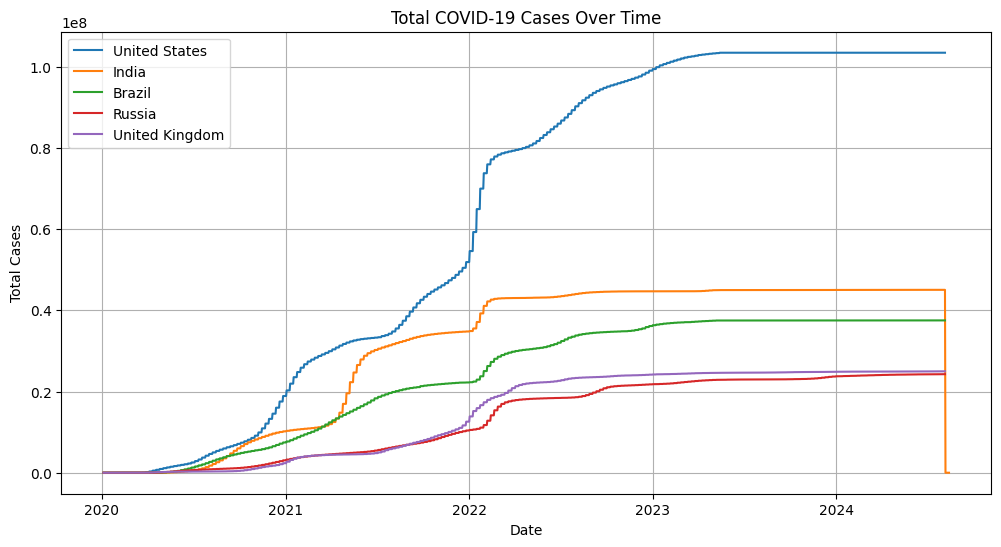

In [ ]:
plt.figure(figsize=(12,6))
for country in countries:
    temp = df_countries[df_countries['location'] == country]
    plt.plot(temp['date'], temp['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
fig = px.line(df_countries, x="date", y="total_vaccinations", color="location",
              title="Total COVID-19 Vaccinations Over Time")
fig.show()

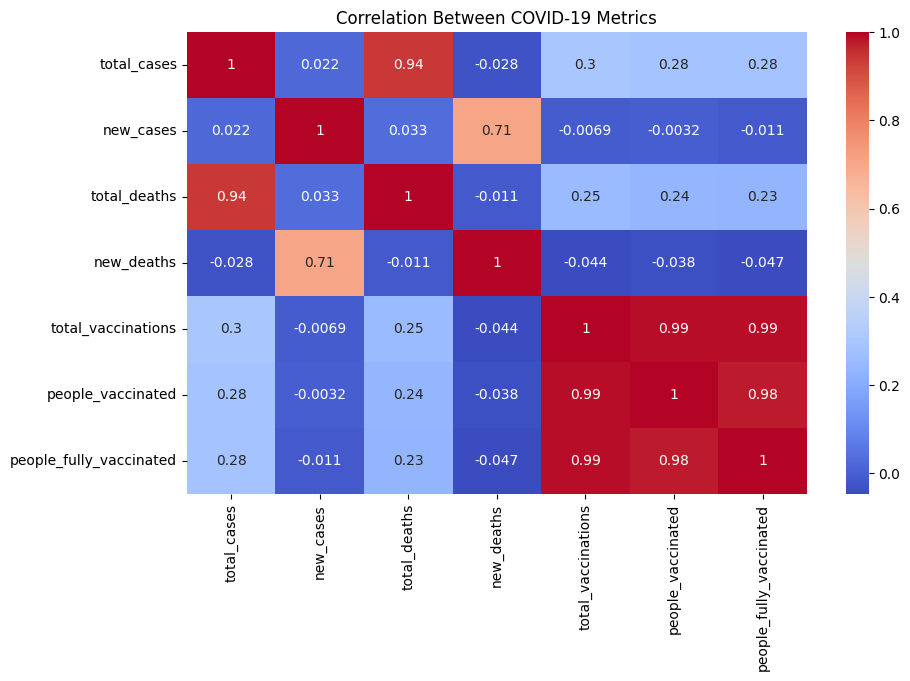

In [ ]:
corr_df = df_countries[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                        'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between COVID-19 Metrics")
plt.show()
